<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Gaussian_Discriminant_Analysis_for_eCommerce%2C_A_Focus_on_Single_Variable_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision boundary: -0.103846517394094


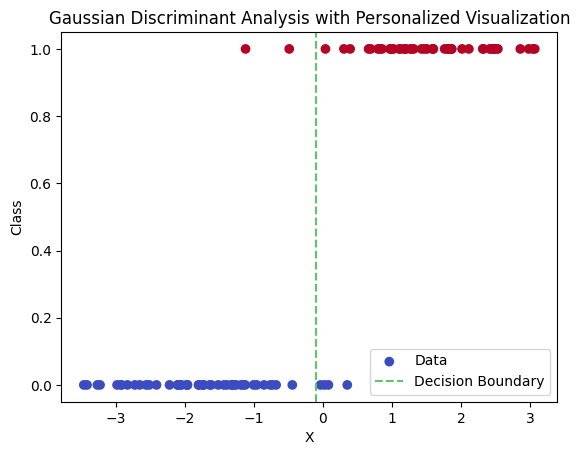

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class GDA:
    def __init__(self):
        # I store the means, variances, and priors for each class here.
        # These parameters serve as the backbone of the Gaussian likelihood calculations.
        self.means = {}
        self.variances = {}
        self.priors = {}

    def fit(self, X, y):
        # To train the model, I calculate the essential statistics: means, variances, and priors.
        # These are derived directly from the data grouped by class.
        classes = np.unique(y)
        for cls in classes:
            X_cls = X[y == cls]
            # Mean: The central location of class-specific data.
            self.means[cls] = np.mean(X_cls)
            # Variance: A measure of spread within the class.
            self.variances[cls] = np.var(X_cls, ddof=1)
            # Priors: The proportion of data points belonging to this class.
            self.priors[cls] = len(X_cls) / len(X)

    def predict(self, X):
        predictions = []
        for x in X:
            # For each observation, I calculate the posterior probability for each class.
            # This requires combining the Gaussian likelihood with the class prior.
            posteriors = {}
            for cls in self.means:
                mean = self.means[cls]
                variance = self.variances[cls]
                prior = self.priors[cls]

                # Gaussian likelihood: A function of the distance of x from the mean,
                # normalized by the variance. This encapsulates how likely x is under this class.
                likelihood = (1 / np.sqrt(2 * np.pi * variance)) * \
                             np.exp(-0.5 * ((x - mean) ** 2) / variance)
                posteriors[cls] = likelihood * prior

            # I select the class with the maximum posterior probability.
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)

    def decision_boundary(self):
        # I focus on the scenario where there are exactly two classes.
        if len(self.means) != 2:
            raise ValueError("Decision boundary calculation requires exactly two classes.")

        class_keys = list(self.means.keys())
        # With equal variances, the boundary is simply the midpoint of the means.
        return (self.means[class_keys[0]] + self.means[class_keys[1]]) / 2

# Example usage
np.random.seed(42)
X = np.concatenate([np.random.normal(-1.5, 1.0, 50), np.random.normal(1.5, 1.0, 50)])
y = np.array([0] * 50 + [1] * 50)

# I initialize the model and fit it to the data, ensuring I extract the key parameters.
model = GDA()
model.fit(X, y)

# The decision boundary represents the threshold where classification shifts between classes.
boundary = model.decision_boundary()
print(f"Decision boundary: {boundary}")

# Predictions provide insight into the model's classification capabilities for each point.
predictions = model.predict(X)

# Visualization: I customize the color palette for enhanced clarity and aesthetics.
plt.scatter(X, y, c=y, cmap='coolwarm', label='Data')  # Custom color palette applied.
plt.axvline(x=boundary, color='#5DC863', linestyle='--', label='Decision Boundary')  # Personalized green boundary.
plt.xlabel("X")
plt.ylabel("Class")
plt.title("Gaussian Discriminant Analysis with Personalized Visualization")
plt.legend()
plt.show()
